<br><br><left><h1 style="font-size:4em;color:#2467C0">Predict Overview: Climate Change Belief Analysis 2022</h1></left>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://images.pexels.com/photos/1667583/pexels-photo-1667583.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" align="middle" style="width:550px;height:360px;"/></td>
<td>
Predict an individual’s belief in climate change based on historical tweet data.
<br>
<br>
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
<br>
<br>
With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. 
<br>
<br>
Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
</td>
</tr>
</table>


## Introduction: What is a carbon footprint?

>A carbon footprint is the total amount of greenhouse gases (including carbon dioxide and methane) that are generated by our actions.

>The average carbon footprint for a person in the United States is 16 tons, one of the highest rates in the world. Globally, the average carbon footprint is closer to 4 tons. To have the best chance of avoiding a 2℃ rise in global temperatures, the average global carbon footprint per year needs to drop to under 2 tons by 2050.

>Lowering individual carbon footprints from 16 tons to 2 tons doesn’t happen overnight! By making small changes to our actions, like eating less meat, taking fewer connecting flights and line drying our clothes, we can start making a big difference. [[Learn more]](https://www.nature.org/en-us/get-involved/how-to-help/carbon-footprint-calculator/)

## Where do we go from here?

> While this new meatless policy certainly has its complexities in how it’s being rolled out, its environmental impact is likely to be huge. So how can your company join the cause? To answer this question, we took a look at Impact Hubs around the world and as it turns out, there are plenty of ways you can reduce your carbon footprint. For some inspiration on how to stay green in your company, take a look at what some companies that have also joined this cause.

> Of course Impact hub isn't the only company to ever make moves towards environmental sustainability (nor is WeWork the first space to introduce policies around sustainability), but as more and more businesses take little steps towards lowering their negative environmental impact, perhaps companies around the world can come together to form an alliance ‒ one that makes a big, bold impact on our collective carbon footprint.

## Companies that joined the effort so far?

>So with that, we’ve decided to share the positivity and keep our eyes on the prize with a list of five big companies that have also joined the cause to reduce their environmental impacts:
- Levi Strauss & Co
- Google
- Siemens
- Starbucks
- Ricola  [[Learn more]](https://impacthub.net/5-big-companies-reducing-their-carbon-footprints/)


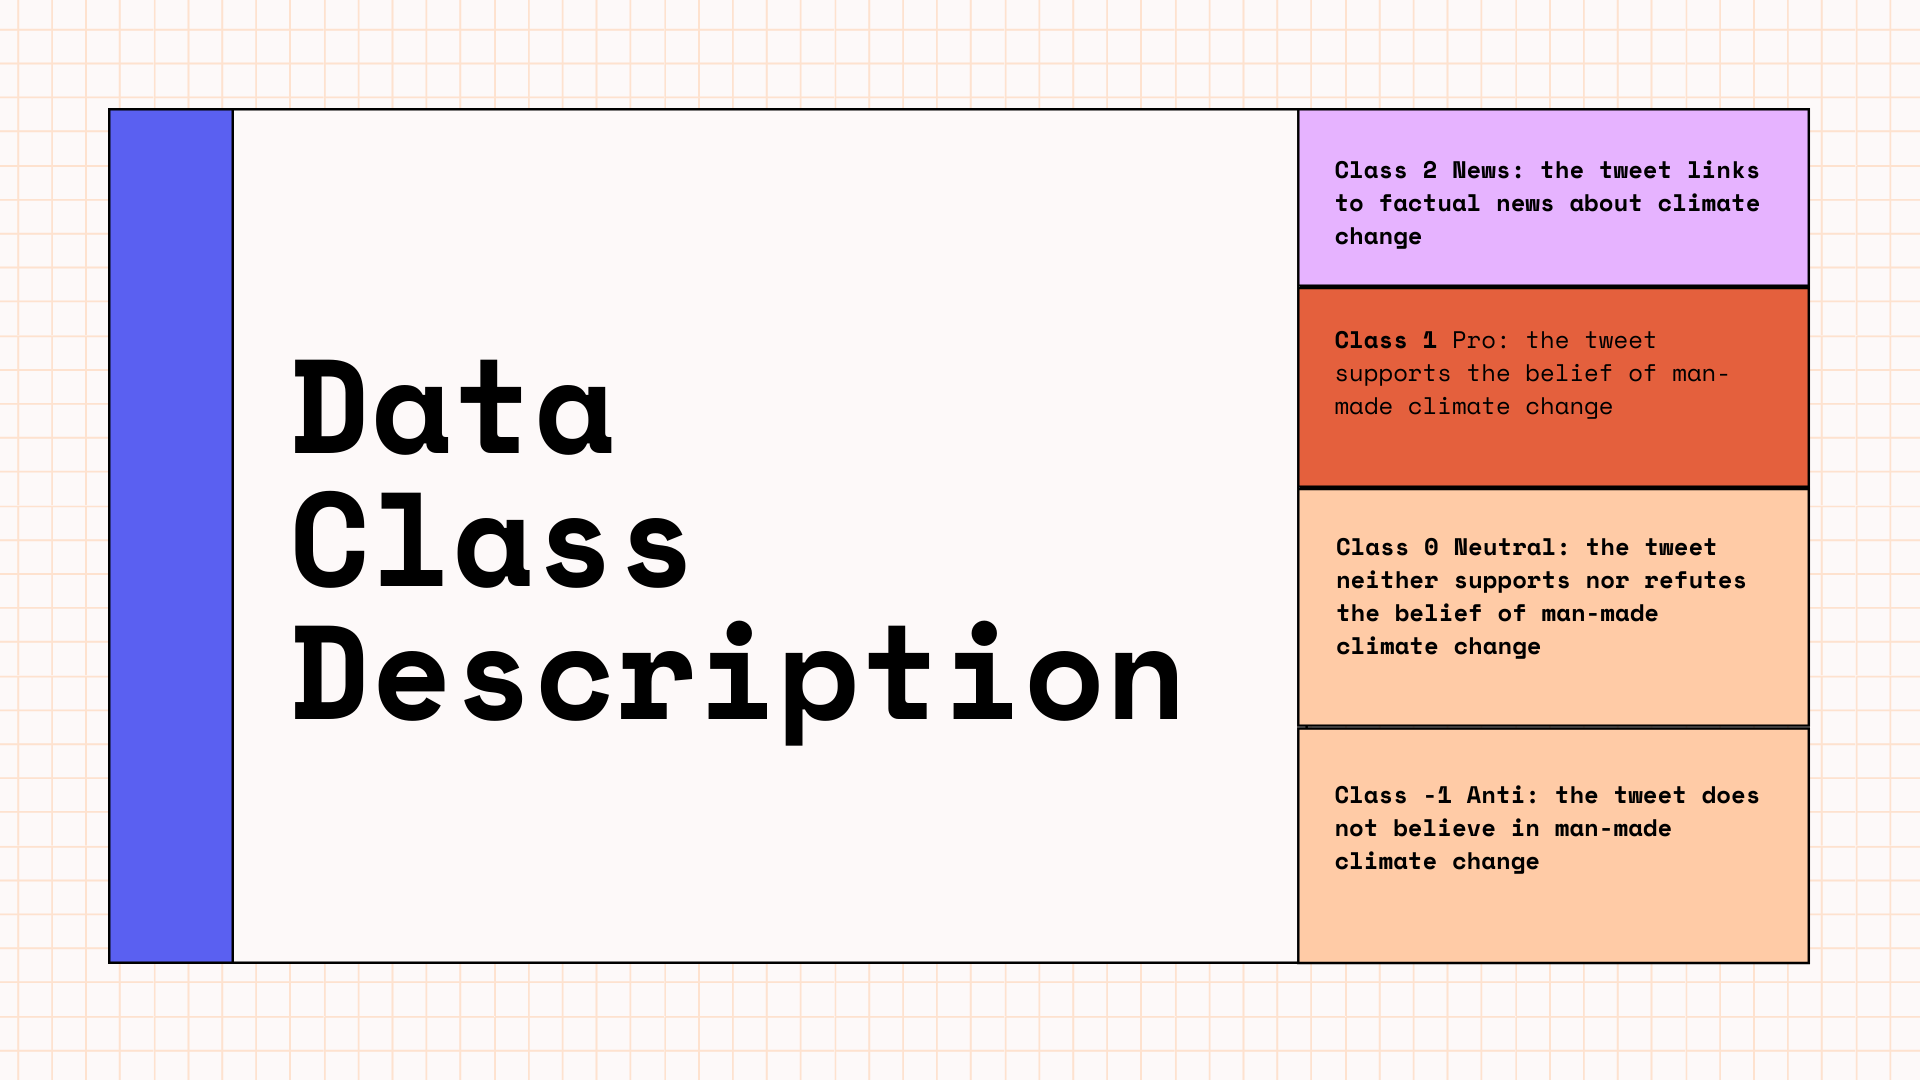

### Company Scenario
Many companies are offering products and services that are environmentally friendly and sustainable in line with their values and ideals, to reduce ones's environmental impact or carbon footprint.

### Problem Statement/Point of View
- They want to determine how people percieve climate change? 
- Do people whether or not believe it is a real threat?
- **How can companies guage how their products/services may be recieved?**

### Our Goal/How might we?
We want to create a reliable and accurate model that allows businesses access to a large pool of consumer sentiment across numerous demographic and geographic groups, allowing them to gain new insights and better inform future marketing strategies.

We'll utilize the Nltk package to apply several NLP methods to a raw Twitter dataset, such as tokenization, POS tagging, and lemmatization, in order to construct meaningful features. We'll use these features to test different learning algorithms in order to create a sentiment analysis model.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Overview</a>

<a href=#two>2. Problem Statement</a>

<a href=#three>3. Setting up comet_ml</a>

<a href=#four>4. Importing Libraries</a>

<a href=#four>5. Loading Data</a>

<a href=#six>6. Data Processing</a>

<a href=#seven>7. Exploratory Data Analysis (EDA)</a>

<a href=#eight>8. Cleaning The Data</a>

<a href=#nine>9. Feature Engeneering</a>

<a href=#ten>10. Model building and Selection</a>

<a href=#eleven>11. Model Evaluation</a>

<a href=#twelve>12. Model Reporting</a>

<a href=#thirteen>13. Log Model Features To Comet_ml</a>

<a href=#fourteen>14. Conclusion</a>

<a href=#fifteen>15. References</a>

## Setting up comet_ml

Comet_ml is used to store all the models run in this notebook under workspace; It stores Model's parameters, matrices, run time, and other model features to simplify comparison.

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
#!pip install comet on the notebook
"""
    Libraries are reinstalled everytime when working on a remote kernel 
"""
!pip install comet_ml

In [2]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="XLxq6xCd22nMBWP5zP1jexAFU",
    project_name="general",
    workspace="fanayajo",
)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/fanayajo/general/94811c7bfab64e2f9e7c3503c59d26ca



## Importing Libraries

In [3]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
# data analysis and wrangling libraries
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# pre processing
import re
import string

# stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from wordcloud import WordCloud

# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preprocessing

In [5]:
df_train = pd.read_csv('/Users/macbook/Documents/Explore_Academy/Machine_Learning/NLP/Classification predict/train.csv', )
df_test = pd.read_csv('/Users/macbook/Documents/Explore_Academy/Machine_Learning/NLP/Classification predict/test.csv')

In [6]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


## Summary statistics
- This info shows that we have two datatypes, an integer and object.
- This table shows that we do not have null values in all our entries

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [10]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

## Dealing with Imbalance
Let's see the sentiment value count

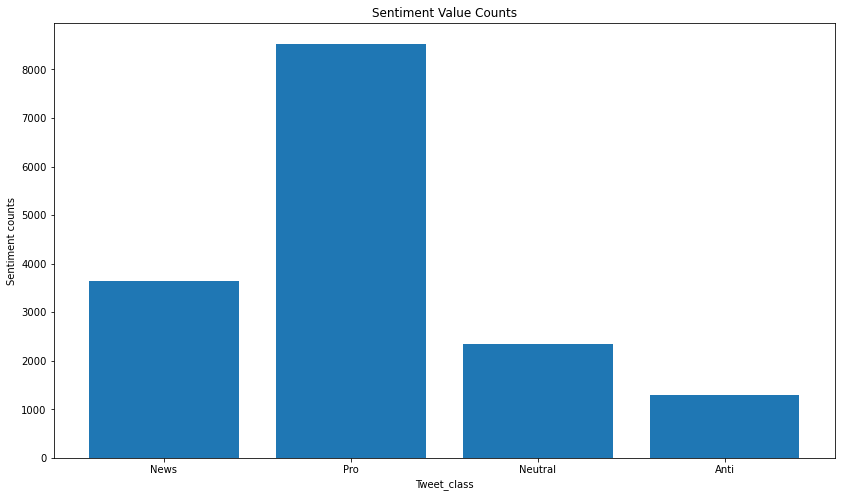

In [11]:
#A bar graph comparing the frequency of each class sentiment
news=df_train[df_train.sentiment == 2].shape[0]
pro =df_train[df_train.sentiment == 1].shape[0]
neutral=df_train[df_train.sentiment == 0].shape[0]
anti =df_train[df_train.sentiment == -1].shape[0]

#visualising
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Pro", "Neutral" , "Anti"],[news, pro, neutral , anti])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Sentiment Value Counts')
plt.show()

> ### Insights
> <ol>
    <li>Firstly, notice the imbalance amongst the classes, which affects the accuracy of our model negatively. This demonstrates the need for resampling before training a model with this data.</li>
    <li>Secondly, as we can see from the graph, the tweets with the highest word count frequency comes from the <b>PRO class</b>, that means they support the belief of man-made cclimate change.</li>
    <li>Finally, There is a good number of repeating tweets, retweets. Since resampling are a set of methods to either repeat sampling from a given sample or population, or a way to estimate the precision of a statistic, removing repeating retweets will allow fair random pick.</li>
    
</ol>

<em><strong>Below we build a function that goes through the whole DataFrame removing all repeating tweets before resampling.</strong></em>

In [12]:
def remove_RT(df):
    """
        This function removes all the retweeted tweets before resampling so that we do not resample
        from already repeating tweets
    """
    df = df.copy()
    tweets = list(df['message'])
    New_tweets = []
    for tweet in tweets:
        if tweet not in New_tweets:
            New_tweets.append(tweet)
        else:
            New_tweets.append(None)
    df['message'] = New_tweets
    for twee in df['message']:
        if twee is None:
            ind = list(df['message']).index(twee)
            df.drop(df.index[ind], inplace = True)
    return df


In [13]:
def resampling(df):
    """
        The class size is a value between the size of the majority class and the size of the minority class.
        This function resamples by downsampling classes with observations greater than the class size and
        upsampling the classes with observations smaller than the class size.
    """
    df = df.copy()
    df = remove_RT(df)
    class_2 = df[df['sentiment'] == 2]  #upsampling
    class_1 = df[df['sentiment'] == 1]  #majority class
    class_0 = df[df['sentiment'] == 0]  #upsampling
    class_n1 = df[df['sentiment'] == -1]  #minority class
    class_size = int(((len(class_1)-len(class_n1))/2) + len(class_n1))
    #downsampling class 1
    rclass_1 = resample(class_1, replace=False, n_samples=class_size, random_state=27)
    #upsampling class 2
    rclass_2 = resample(class_2, replace=True, n_samples=class_size, random_state=27)
    #upsampling class 0
    rclass_0 = resample(class_0, replace=True, n_samples=class_size, random_state=27)
    #upsampling class -1
    rclass_n1 = resample(class_n1, replace=True, n_samples=class_size, random_state=27)
    dfsampled = pd.concat([rclass_2, rclass_1, rclass_0, rclass_n1])
    
    return dfsampled

> ### Insight
> - The goal of this function was to make every class have the same number of entries 
> - This is done by creating a class, by picking at random from its entries until we have a desired class size
> - The desired class size is determined by getting the midpoint ( middle of the length of the class with least data and length of the class with most data.
> -  If a class has less data than the class size then random picking is done without replacement, if it is larger then random picking is done with replacement.

In [14]:
Resampled_Train_DF = resampling(df_train)

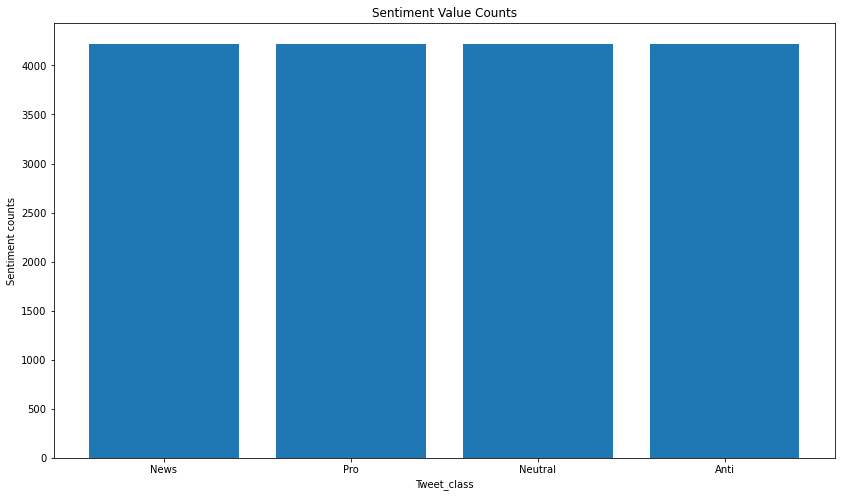

In [15]:
#A bar graph comparing the frequency of each class sentiment in resampled dataframe
news=Resampled_Train_DF[Resampled_Train_DF.sentiment == 2].shape[0]
pro =Resampled_Train_DF[Resampled_Train_DF.sentiment == 1].shape[0]
neutral=Resampled_Train_DF[Resampled_Train_DF.sentiment == 0].shape[0]
anti =Resampled_Train_DF[Resampled_Train_DF.sentiment == -1].shape[0]

#visualization
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Pro", "Neutral" , "Anti"],[news, pro, neutral , anti])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Sentiment Value Counts')
plt.show()

<left><h1 style="font-size:2em;color:#2467C0">Exploratory Data Analysis</h1></left>

- Word count analysis
- The number a punctuations
- For Twitter Data: amount of retweets
- Word clouds for each class
- Sentiment analysis

In [16]:
# This line of code counts the number of words in each tweet and add a column of those counts into the existing dataframe 

word_count = df_train['message'].apply(lambda x: len(x.split()))
df_train['word_count'] = word_count

### Word count boxplot

<Figure size 1008x576 with 0 Axes>

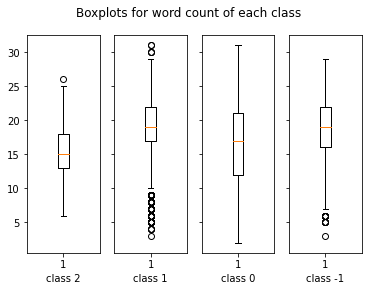

In [17]:
# create subplots
plt.figure(figsize=(14,8))
fig,axs = plt.subplots(1, 4, sharey = True)

# plot title
fig.suptitle('Boxplots for word count of each class')

# class 2 plot
y2 = df_train[df_train['sentiment'] == 2]['word_count']
axs[0].boxplot(y2)
axs[0].set_xlabel('class 2')

# class 1 plot
y1 = df_train[df_train['sentiment'] == 1]['word_count']
axs[1].boxplot(y1)
axs[1].set_xlabel('class 1')

# class 0 plot
y0 = df_train[df_train['sentiment'] == 0]['word_count']
axs[2].boxplot(y0)
axs[2].set_xlabel('class 0')

# class -1 plot
y_1 = df_train[df_train['sentiment'] == -1]['word_count']
axs[3].boxplot(y_1)
axs[3].set_xlabel('class -1')

plt.show()

> ### Insight
> The boxplots of word count show distinct properties for each class. The presence of outliers, varying medians and range sizes imply that the word count property will add substantial value to model training. neutral class have the highest range which implies that people with neutral beliefs either write long tweets justifying both sides or simply refuse to take a side as oppose to anti and pro classes where people will write average words only justfying their beliefs.

### Word count Distribution plot

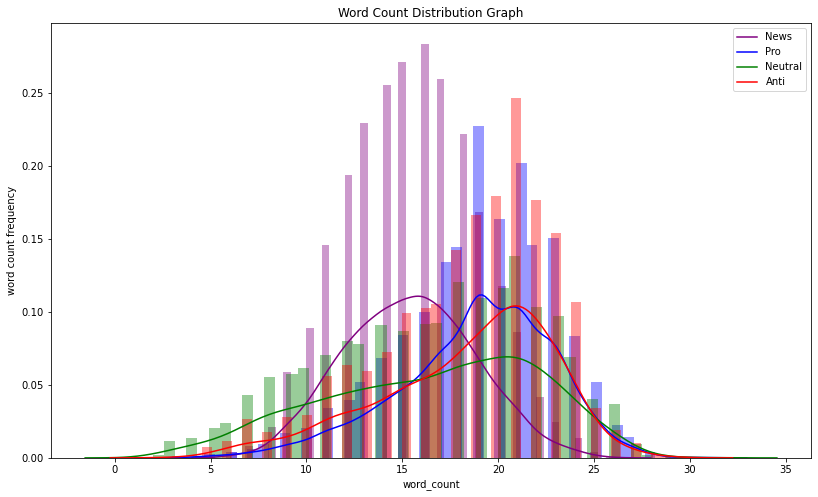

In [18]:
a1 =df_train[df_train.sentiment == 2]['word_count']
a2 =df_train[df_train.sentiment == 1]['word_count']
a3 =df_train[df_train.sentiment == 0]['word_count']
a4 =df_train[df_train.sentiment == -1]['word_count'] 
plt.figure(1,figsize=(30,8))
plt.subplot(1, 2, 1)
plt.ylabel('word count frequency')
sns.distplot(a1,color='purple',bins=50)
sns.distplot(a2,color='blue',bins=50)
sns.distplot(a3,color='green',bins=50)
sns.distplot(a4,color='red',bins=50)
plt.legend(['News','Pro', 'Neutral','Anti'])
plt.title('Word Count Distribution Graph')

plt.show()

> ### Insight
> This graph shows the distribution of the word count frequency. It shows the relationship between the number of words in a tweet and it's class. From the graph we can see that the tweets from:
> - **class News have a length from 5 to 25 and it's tweet length has normal distribution along mean 16.** It also shows the same patten for the rest of the classes. 
> - With **class Pro having work count lenths from 4 till 30, with more tweets around length 21.** 
> - **Class neutral has lengths from 2 to 30, with most tweets around 20.** 
> - And **Class anti has lengths from 4 to 30, with most tweets around 21.**

## Puntuation Count

In [19]:
# This line of code counts the number of punctuation in each tweet then add the column of those counts into the existing dataframe

df_train['punct_count']  = df_train['message'].apply(lambda x: len([i for i in x if i in string.punctuation]))


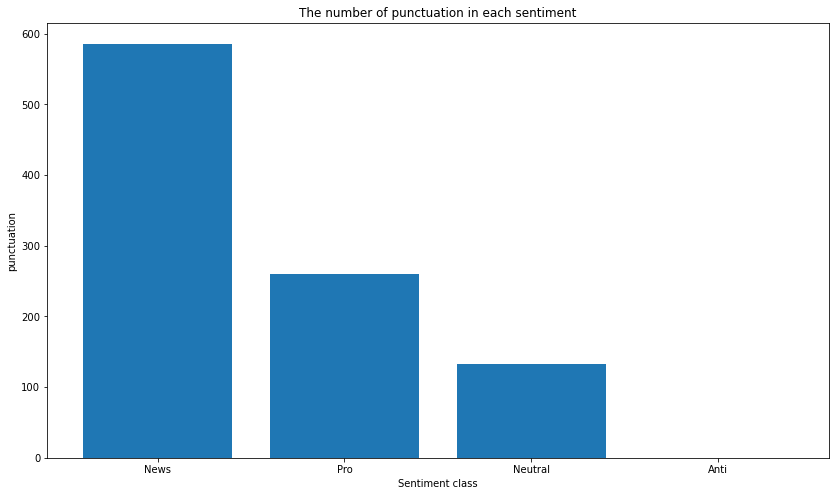

In [20]:
# A bar graph showing the number of punctuations as per class
# labling the classes
news=df_train[df_train.punct_count == 2].shape[0]
pro =df_train[df_train.punct_count == 1].shape[0]
neutral=df_train[df_train.punct_count == 0].shape[0]
anti =df_train[df_train.punct_count == -1].shape[0]

#plotting the graph and setting the axis labels
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Pro", "Neutral" , "Anti"],[news, pro, neutral , anti])
plt.xlabel('Sentiment class')
plt.ylabel('punctuation')
plt.title('The number of punctuation in each sentiment')
plt.show() #visualizing the graph

> ### Insight
> This graph shows how punctuation is used per class. The tweets from the News class (class 2) has the most punctuation use in the tweets, which shows how legitimate or factual take heed of puctuation the use of puntuation or grammar . We also notice how most tweets from the Anti class (class -1) make no use of punctuation. From this we can savely assume that most tweets that make less use of punctuation are mostly not factual.

### Analysing stopwords

In [21]:
# A function that creates a corpus based on the target feature
def create_corpus(df,sentiment):
    """
    create corpus based on the target feature
    """
    list1 = []
    #appends each word from the messege to the list above and return the list
    for s in df_train[df_train["sentiment"]== sentiment].message.str.split():
        for i in s:
            list1.append(i)
    return list1    

In [22]:
# import libraries and set stopwords
from collections import defaultdict
stop = set(stopwords.words('english'))

#corpus created for each class
corpus2 = create_corpus(df=df_train, sentiment=2)
corpus1 = create_corpus(df=df_train, sentiment=1)
corpus0 = create_corpus(df=df_train, sentiment=0)
corpus3 = create_corpus(df=df_train, sentiment=-1)



word_dict2=defaultdict(int)
for word in corpus2:
    if word in stop:
        word_dict2[word]+=1
        
word_dict1 =defaultdict(int)
for word in corpus1:
    if word in stop:
        word_dict1[word]+=1
    
word_dict0= defaultdict(int)
for word in corpus0:
    if word in stop:
        word_dict0[word]+=1
        
word_dict3= defaultdict(int)
for word in corpus3:
    if word in stop:
        word_dict3[word]+=1

In [23]:
#sorting the results in descending order and get the firs 10 results
most2 = sorted(word_dict2.items(), key=lambda x:x[1], reverse=True)[:10]
most1 = sorted(word_dict1.items(), key=lambda x:x[1], reverse=True)[:10]
most0 = sorted(word_dict0.items(), key=lambda x:x[1], reverse=True)[:10]
most3 = sorted(word_dict3.items(), key=lambda x:x[1], reverse=True)[:10]
x2,y2 =zip(*most2)
x1 ,y1=zip(*most1)
x0 ,y0=zip(*most0)
x3 ,y3=zip(*most3)

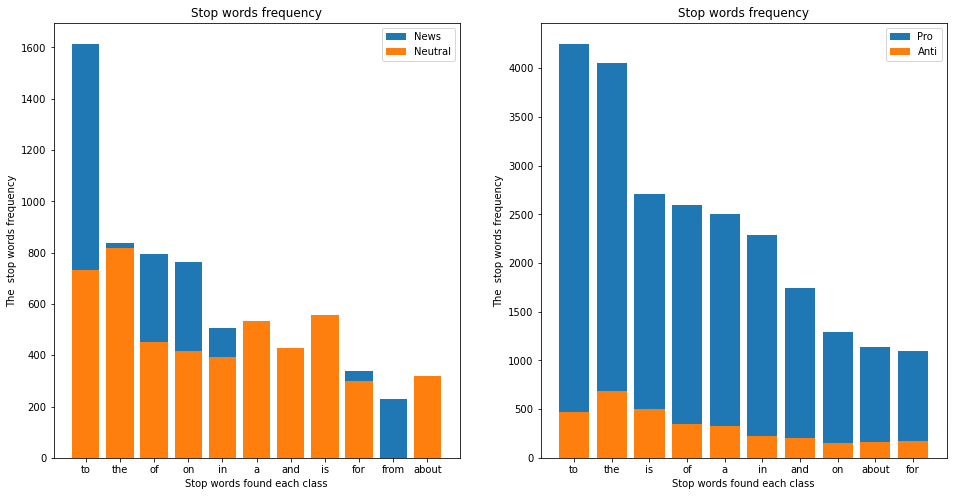

In [24]:
#ploting the graphs
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(x2,y2)
plt.title("Stop words frequency")
plt.ylabel('The  stop words frequency')
plt.xlabel('Stop words found each class')
plt.subplot(1, 2, 2)
plt.bar(x1, y1)
plt.title("Stop words frequency")
plt.ylabel('The  stop words frequency')
plt.xlabel('Stop words found each class')
plt.subplot(1, 2 , 1)
plt.bar(x0,y0)
plt.legend(['News','Neutral'])
plt.subplot(1 , 2, 2)
plt.bar(x3,y3)
plt.legend(['Pro','Anti'])

<left><h1 style="font-size:2em;color:#2467C0">Data Cleaning</h1></left>

- Removing stopwords
- Removing punctuation
- Removing urls
- Removing characters
- Removing retweets

In [25]:
#making a copy of the dataframe which allows us to make some changes without changing the original dataframe
df_copy = df_train.copy()
df_test = df_test.copy()

In [26]:
#using regular expressions to remove tagy symbols
def remove_pattern(input_txt, pattern):
    """
    this function checks for patterns in the input_txt and removes them
    """
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [27]:
def  clean_text(df, text_field):
    """
    this function takes in a dataframe,text field and removes urls from the text field then return a dataframe with urls removed form the text field
    """
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
#test_clean = clean_text(clean_test_df, "message")
df_clean = clean_text(df_copy,"message")
df_test = clean_text(df_test,"message")

In [28]:
#A function that removes punctuations
def remove_punctuations(text):
    table = str.maketrans("","",string.punctuation)
    txt = text.translate(table)
    return txt
#removing punctuationd from the message column
df_clean["message"] = df_clean['message'].apply(remove_punctuations)
df_test["message"] = df_test['message'].apply(remove_punctuations)


In [29]:
#A function that removes stop words 
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    r = " ".join(text)
    return r
#removing stop words from the message column
df_clean["message"]=df_clean["message"].apply(remove_stopwords)
#visualing the cleaned dataframe
df_clean.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,19,12
1,1,like lack evidence anthropogenic global warming,126103,10,1
2,2,researchers say three years act climate change...,698562,19,12
3,1,todayinmaker wired 2016 pivotal year war clima...,573736,15,8
4,1,2016 racist sexist climate change denying bigo...,466954,18,8


### Word Clouds from Cleaned Data
A word cloud is a good representation to show the popular words one has in their data. Below we ploted a word cloud showing the most popular words in our data.

In [30]:
df_clean['message'] = df_clean['message'].apply(lambda x: x.replace('climate change',''))
df_clean['message'] = df_clean['message'].apply(lambda x: x.replace('global warming',''))
df_test['message'] = df_clean['message'].apply(lambda x: x.replace('climate change',''))
df_test['message'] = df_clean['message'].apply(lambda x: x.replace('global warming',''))

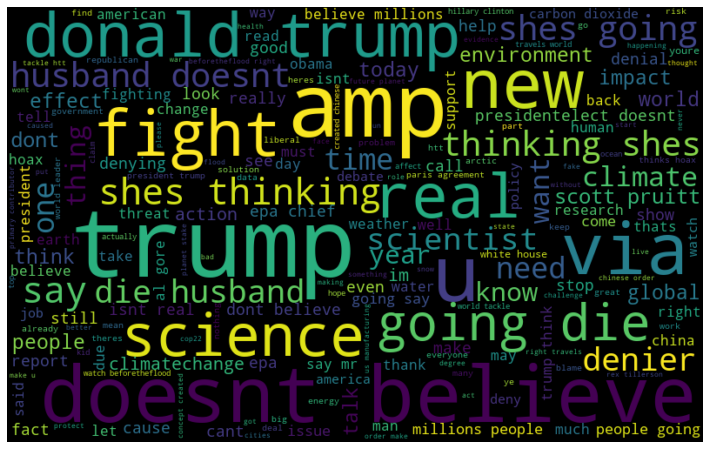

In [31]:
# Word cloud for the overall data checking out which words do people use more often
all_words = ' '.join([text for text in df_clean['message']])

# Word cloud for the overall data checking out which words do people use more often
wordcloud = WordCloud(width=800, height=500,random_state=21,max_font_size=110).generate(all_words)

#ploting the word cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show() #visualizing the word cloud 

> ### Insight 
> Because we replate url patterns with urlweb, with what we have in the wordcloud visualization, this gives an assurance that we obtained relevant tweets/data to our topic

### Word cloud per class

In [32]:
class2_words = ' '.join([text for text in df_clean[df_train['sentiment']==2]['message']])
class1_words = ' '.join([text for text in df_clean[df_train['sentiment']==1]['message']])
class0_words = ' '.join([text for text in df_clean[df_train['sentiment']==0]['message']])
class_neg1_words = ' '.join([text for text in df_clean[df_train['sentiment']==-1]['message']])

#visualizing the classes
wordcloud2 = WordCloud(width=800, height=500,random_state=21,max_font_size=110).generate(class2_words)
wordcloud1 = WordCloud(width=800, height=500,random_state=21,max_font_size=110).generate(class1_words)
wordcloud0 = WordCloud(width=800, height=500,random_state=21,max_font_size=110).generate(class0_words)
wordcloudneg1 = WordCloud(width=800, height=500,random_state=21,max_font_size=110).generate(class_neg1_words)

<Figure size 72000x36000 with 0 Axes>

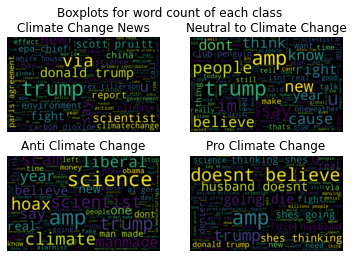

In [33]:
fig = plt.figure(figsize=(1000,500))
fig,axs = plt.subplots(2, 2)
fig.suptitle('Boxplots for word count of each class')

# word cloud plots
axs[0,0].imshow(wordcloud2, interpolation="bilinear")
axs[1,1].imshow(wordcloud1, interpolation="bilinear")
axs[0,1].imshow(wordcloud0, interpolation="bilinear")
axs[1,0].imshow(wordcloudneg1, interpolation="bilinear")

# removing axes
axs[0,0].axis('off')
axs[1,1].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')

# word cloud titles
axs[0,0].set_title('Climate Change News')
axs[1,1].set_title('Pro Climate Change')
axs[0,1].set_title('Neutral to Climate Change')
axs[1,0].set_title('Anti Climate Change')

plt.show() 




The key take away from these word clouds is that each class has its own distinct predominant words(or phrases), broken down as follows:

    News: "Donald Trump"
    Neutral: "People"
    Anti: "Climate"
    Pro: "Believe"



<left><h1 style="font-size:2em;color:#2467C0">Feature Engineering</h1></left><br>Extracting websites from tweets

In [77]:
df_clean['sites'] = df_train['message'].apply(lambda x: re.search("(?P<url>https?://[^\s]+)", x).group("url") if 'https' in x and re.search("(?P<url>https?://[^\s]+)", x) != None else None)

### polarity and subjectivity

In [78]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df_clean['subjectivity'] = df_clean["message"].apply(get_subjectivity)

df_clean['polarity'] = df_clean['message'].apply(get_polarity)
df_clean.head()

,sentiment,message,tweetid,word_count,punct_count,sites,subjectivity,polarity
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,19,12,https://t.co/yeLvcEFXkC,0.333333,0.166667
1,1,like lack evidence anthropogenic,126103,10,1,None,0.000000,0.000000
2,2,researchers say three years act late,698562,19,12,https://t.co/WdT0KdUr2f,0.600000,-0.300000
3,1,todayinmaker wired 2016 pivotal year war,573736,15,8,https://t.co/44wOTxTLcD,0.800000,0.500000
4,1,2016 racist sexist denying bigot leading poll...,466954,18,8,None,0.000000,0.000000


### Sentiment analysis

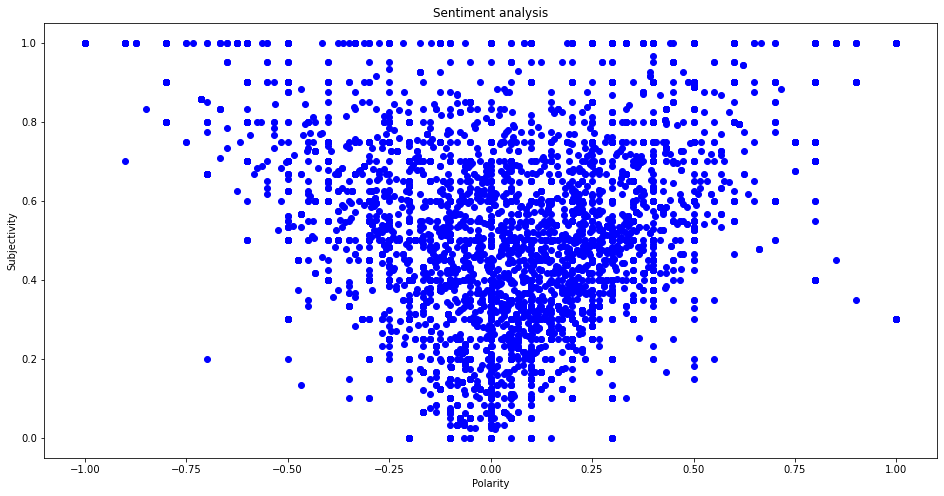

In [79]:
#polarity and subjectivity plot
plt.figure(figsize=(16,8))
for i in range(0, df_clean.shape[0]):
    plt.scatter(df_clean['polarity'][i],df_clean['subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



Acording to the sentiment. analysis This tells we have majority of the tweets clustered at the center. Which tells us that based on the polarity a lot of tweets are recognised as neutral tweets


<left><h1 style="font-size:2em;color:#2467C0">Model building and Selection</h1></left><br>
We buld three different models

- SKlearn Pipeline Model
- Logistic Regression Model
- Support Vector Marchine (SVM) Model



### Building the sk pipeline

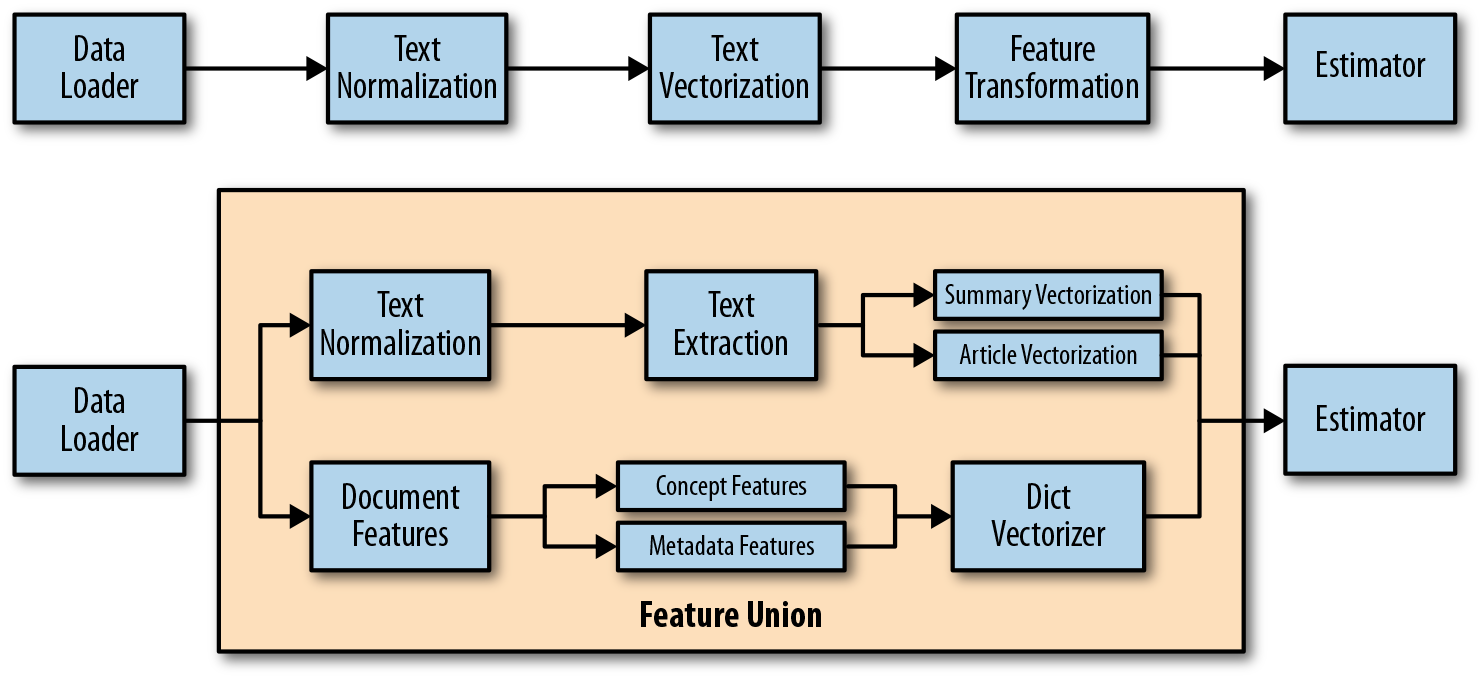

### Splitting Train data and Assigning Test data

In [80]:
# splitting the training data
X = df_train['message']  
y = df_train ['sentiment']
Xt = df_test['message']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# import LinearSVC
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline
# this is a pipeline for a trial model
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])
# this is pipeline for unseen data
unseen_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 
# Feed the all training data through the pipeline for unseen data
unseen_clf.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [82]:
# Testing the model
y_pred = text_clf.predict(X_test)
YY = unseen_clf.predict(Xt)

In [83]:
s=pd.DataFrame(YY)
f_new = s.rename(columns={0: 'sentiment'})
tweedid=df_test['tweetid']
df_merge_col = pd.merge(tweedid, f_new, left_index=True, right_index=True)
df_merge_col.to_csv('Pipeline_Predictions.csv',index=False)

<left><h1 style="font-size:2em;color:#2467C0">Model Matrices</h1></left>

In [84]:
# model evaluation 
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics

In [85]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix \n\n {}".format(conf_matrix))

Confusion matrix 

 [[ 188   48  147   18]
 [  26  286  289   65]
 [  35  110 2221  232]
 [   5   20  193  863]]


In [87]:
f1 = f1_score(np.array(y_test), y_pred, average = 'weighted')
print('f1 Score = {}'.format(f1))

f1 Score = 0.7398920960204146


In [ ]:
accu_score = metrics.accuracy_score(y_test,y_pred) 
print('Accuracy Score = {}'.format(accu_score))

In [44]:
precision = precision_score(np.array(y_test), y_pred, average = 'weighted')
print('Precision Score = {}'.format(precision))

Precision Score = 0.7424919180281266


In [45]:
recall = recall_score(y_test, y_pred, average = 'weighted')
print('Recall Score = {}'.format(recall))

Recall Score = 0.7496839443742098


In [46]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.47      0.57       401
           0       0.62      0.43      0.51       666
           1       0.78      0.85      0.82      2598
           2       0.73      0.80      0.76      1081

    accuracy                           0.75      4746
   macro avg       0.72      0.64      0.66      4746
weighted avg       0.74      0.75      0.74      4746



<left><h1 style="font-size:2em;color:#2467C0">Build the Logistic Model</h1></left>

In [47]:
#creating a copy of our dataframe
df_copy = df_train.copy()

#visualising the copy of the dataframe
df_copy.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,12
1,1,It's not like we lack evidence of anthropogeni...,126103,10,1
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,12
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,8
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,8


In [48]:
#variable assignment
X= np.array(df_train['message'])
y= np.array(df_train['sentiment'])

#splitting the dataset into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing the data set
#from sklearn.preprocessing import Normalizer
#normalise = Normalizer()
#X_train = normalise.fit_transform(X_train)
#X_test = normalise.fit_transform(X_test)


#transforming the sentiments
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#selecting the logistic regression model from sklearn and selecting lbfgs as our solver
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
#predictions[0]

# pickle
#model_save_path = "lr_model.pkl"
#with open(model_save_path,'wb') as file:
   # pickle.dump(lr_model, file)

### Testing the accuracy of the model

In [49]:
#importing the metrics library
from sklearn import metrics

# Printing a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[  81   32  150   15]
 [   9  154  225   37]
 [   9   49 1542  155]
 [   1    6  140  559]]


In [50]:
# creating a dataframe of the confusion matrix 
df_confusion = pd.DataFrame(metrics.confusion_matrix(y_test,predictions))
#visualing the confusion dataframe
df_confusion

,0,1,2,3
0,81,32,150,15
1,9,154,225,37
2,9,49,1542,155
3,1,6,140,559


In [51]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.81      0.29      0.43       278
           0       0.64      0.36      0.46       425
           1       0.75      0.88      0.81      1755
           2       0.73      0.79      0.76       706

    accuracy                           0.74      3164
   macro avg       0.73      0.58      0.61      3164
weighted avg       0.74      0.74      0.72      3164



This seems to do well for the classes with more messages

In [52]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7383059418457648


<left><h1 style="font-size:2em;color:#2467C0">Build the Logistic Model</h1></left>
SVM (Support Vector Machines) uses the training data and plots the data as points in space, it will then find a separating gap between two clases and use this gap as a dividing line(hyperplane), the new data will be classified acording to this deviding line. we will first copy the data to use in our SVM model

In [53]:
df_SVM_train = df_train.copy()
df_SVM_test=df_test.copy()

In [54]:
#Removing puncuations from the messege column so that we can use the text only for the model
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [55]:
df_SVM_test["message"] = df_SVM_test['message'].apply(remove_punctuations)
df_SVM_test["message"] = df_SVM_test['message'].apply(remove_punctuations)

In [56]:
#Defining training and testing data
X_SVM = df_SVM_train['message']

y_SVM = df_SVM_train['sentiment']


x_test = df_SVM_test['message']

In [57]:
'''
SVM uses numerical data so the data will be converted to numerical data using CountVectorizer
'''

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_SVM)
X_train_counts.shape

(15819, 31905)

In [58]:
#Transforming also the x_test data to numerical data
X_test_counts = count_vect.transform(x_test)
X_test_counts.shape

(10546, 31905)

In [59]:
#Splitting the dataset into training and validation set

from sklearn.model_selection import train_test_split

x_train, x_test, Ytrain, Ytest = train_test_split(X_train_counts, y_SVM, test_size=0.2, random_state=42)

from above we saw that our data have the matching shape so we will proceed to fitting the data using svm model

### Fitting our data using SVM model

In [60]:
from sklearn.svm import SVC  # to be added on the import cell
svm = SVC()
svc = SVC(kernel='linear')
svc.fit(x_train, Ytrain)

SVC(kernel='linear')

In [61]:
ypred = svc.predict(x_test)

### Testing the Accuracy of the Model, by compering the predicted values vs tesing values

In [62]:
#importing the metrics library
from sklearn import metrics

# Printing a confusion matrix
print(metrics.confusion_matrix(Ytest,ypred))

[[ 140   49   80    9]
 [  33  212  160   20]
 [  58  150 1398  149]
 [   7   24  119  556]]


In [63]:
# Print the overall accuracy
print(metrics.accuracy_score(Ytest,ypred))

0.7288242730720607


In [64]:
# creating a dataframe of the confusion matrix 
df_confusion = pd.DataFrame(metrics.confusion_matrix(Ytest,ypred))
#visualing the confusion dataframe
df_confusion

,0,1,2,3
0,140,49,80,9
1,33,212,160,20
2,58,150,1398,149
3,7,24,119,556


### Predicting the results of the provided testing set from our fitted SVM model

In [65]:
y_pred = svc.predict(X_test_counts)

### Saving the results to a csv file named SVM_Predictions

In [91]:
s=pd.DataFrame(y_pred)
f_new = s.rename(columns={0: 'sentiment'})
tweedid=df_SVM_test['tweetid']
df_merge_col = pd.merge(tweedid, f_new, left_index=True, right_index=True)
df_merge_col.to_csv('SVM_Predictions.csv',index=False)

### Log Model Features To Comet_ml

In [67]:
#Create a dictionary of model parameters
params = {"random_state": 42,
          "model_type": "Pineline",
          "feature_extraction": "TfidfVectorizer"
          }

In [88]:
#Create dictionary of important metrics
metrics = {"f1": f1,
           "Accuracy_Score": accu_score,
           "recall": recall,
           "precision": precision
           }

In [89]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

## Conclusion



In this Notebook, we conducted a whirlwind overview of vectorization techniques and began to consider their use cases for different kinds of data and different machine learning algorithms. we noticed some imbalance in the classes and decided to upscale the classes .

We have trained a couple of models and in conclusion we chose the tfidfvectorizer Pipeline Model because it substaintially outperformed other models for certain tasks. It also gave an accuracy score that is higher than that of theother models. This model will be able to classify whether or not a person believes in climate change, based on their novel tweet data.


In [90]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/fanayajo/general/94811c7bfab64e2f9e7c3503c59d26ca
COMET INFO:   Metrics:
COMET INFO:     Accuracy_Score : 0.7496839443742098
COMET INFO:     f1             : 0.7398920960204146
COMET INFO:     precision      : 0.7424919180281266
COMET INFO:     recall         : 0.7496839443742098
COMET INFO:   Parameters:
COMET INFO:     C                       : 1.0
COMET INFO:     break_ties              : False
COMET INFO:     cache_size              : 200
COMET INFO:     class_weight            : 1
COMET INFO:     clf                     : LinearSVC()
COMET INFO:     clf_C                   : 1.0
COMET INFO:     clf__C                  : 1.0
COMET INFO:     clf__class_weight       : 1
COMET INFO:     clf__dual               : True
COMET INFO:     clf__fit_inte